# ROMMA Scraping again

Almoset everyoune knows that you can get time series by scraping pages.


https://www.infoclimat.fr/climatologie/normales-records/1981-2010/grenoble-lvd/valeurs/38538002.html

http://romma.fr/station_24.php?id=4&tempe=1

In [178]:
import matplotlib.pyplot as plt
import numpy as np 
import re
import time
import requests

The good stuff is hiden in a frame but is easily accesible

In [241]:
url = 'http://romma.fr/frame_station24.php'
user_agent = {'User-agent': 'Mozilla/5.0'}


r = requests.post( url, 
                 headers=user_agent,
                 params={"id_station":109, "tempe":1})

In [242]:
txt = r.text

#I was dumping this from chrome and it  imposes fixed line widths
#txt = re.sub('=\n','',txt)

#json style null->nan
#because we are going to cast string to float later
txt = re.sub('null', 'nan', txt)

pp = re.compile( 'var ([\w|\s]*?)array=.*?\[(.*?)\]', re.DOTALL)
mm = pp.findall(txt)

data = dict(mm)
data.keys()

bits = ['time', 'temp', 'pluie', 'intenspluie', 'pression', 'hum', 'rad']
meteo = {}
for key in bits:
    meteo[key] = np.array( [ float(x) for x in data[key].split(',')])

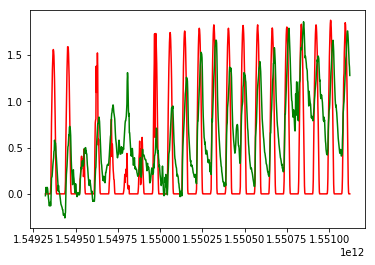

In [243]:
ww = 7*24*6
plt.plot(meteo['time'][-ww:], meteo['rad'][-ww:]/300,'r')
#plt.plot(tt[-ww:],np.diff(temp,n=1)[-ww:],'b')
plt.plot( meteo['time'][-ww:], meteo['temp'][-ww:]/10,'g')

    

In [244]:
numdays = 21
ts = [i for i in range(-1,-1 - numdays*24*6, -24*6)]

day_intervals = [list(zip(meteo['temp'],meteo['time']))[i:j] for i,j in  zip(ts[1:],ts)]
mx = [max(day) for day in day_intervals if day]
x,y = zip(*mx)
[time.ctime(t/1000.) for t in y]

['Mon Feb 25 16:00:00 2019',
 'Fri Feb 22 15:30:00 2019',
 'Tue Feb 19 15:30:00 2019',
 'Sat Feb 16 16:00:00 2019',
 'Wed Feb 13 16:30:00 2019',
 'Sun Feb 10 14:00:00 2019',
 'Wed Feb  6 15:00:00 2019',
 'Sat Feb  2 10:30:00 2019',
 'Thu Jan 31 17:30:00 2019',
 'Sun Jan 27 15:00:00 2019',
 'Sat Jan 26 15:30:00 2019']

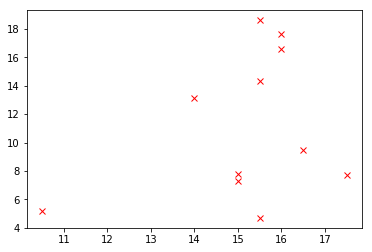

In [245]:
XS, YS = zip(*mx)
YS = [(int(y)//1000 % (24*3600)) /3600 for y in YS]
plt.plot(YS,XS, 'rx')

In [246]:
stuff = meteo['time'][meteo['rad'] == 0]
xx = stuff[:-1][np.diff(stuff)  > 6*600000]

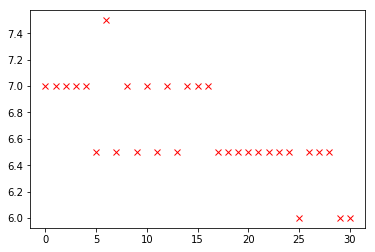

In [247]:
plt.plot(range(len(xx)), [int(y)//1000 % (24*3600) /3600 for y in xx] ,'rx')